# Imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data1 = pd.read_csv("/content/user1_data.csv")
data2 = pd.read_csv("/content/user2_data.csv")

#Data Visualiztion

In [22]:
data1.columns

Index(['ttime', 'pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [23]:
data1.shape

(19341, 8)

In [24]:
data2.columns

Index(['ttime', 'pm1', 'pm2', 'pm3', 'am', 'sm', 'lum', 'temp', 'humd',
       'pres'],
      dtype='object')

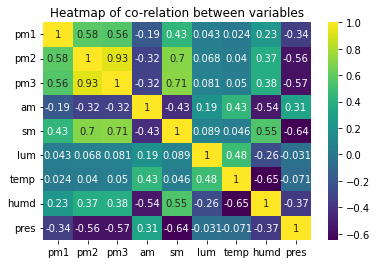

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data2.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables')
plt.show()

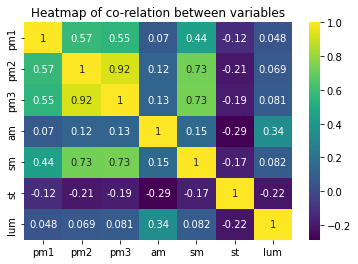

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data1.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables')
plt.show()

In [29]:
data1.tail() 

,ttime,pm1,pm2,pm3,am,sm,st,lum
19336,2023-03-10 08:45:06,1.11,1.11,28.49,3.2,291.0,29.40,384.0
19337,2023-03-10 09:12:06,0.55,1.11,28.49,3.2,292.0,29.32,384.0
19338,2023-03-10 09:39:09,1.11,1.11,28.49,2.4,291.0,29.24,384.0
19339,2023-03-10 10:06:09,0.55,1.11,28.49,1.6,291.0,29.17,384.0
19340,2023-03-10 11:01:05,0.55,1.11,28.49,8.8,292.0,29.06,384.0


#Data Pre-Prosessing

In [30]:
data1['ttime']=pd.to_datetime(data1.ttime, format='%Y-%m-%d %H:%M:%S')
data1.set_index('ttime',inplace=True)
data1['day']=data1.index.day
data1['Month']=data1.index.month
data1['year']=data1.index.year
data1['hour']=data1.index.hour
data1['min']=(data1.index.minute//5)+1
data1.reset_index(inplace=True)
data1=data1.drop(['ttime'],1)
data1

<ipython-input-30-7d9a62e5c811>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data1=data1.drop(['ttime'],1)


,pm1,pm2,pm3,am,sm,st,lum,day,Month,year,hour,min
0,3.63,0.00,0.00,3.2,7813.0,25.65,15001.0,18,7,2022,15,9
1,4.19,0.00,0.00,4.8,7692.0,25.66,13863.0,18,7,2022,15,10
2,4.74,0.00,0.00,4.0,7813.0,25.67,13788.0,18,7,2022,15,11
3,5.30,0.00,0.00,4.8,7813.0,25.68,14383.0,18,7,2022,15,12
4,0.55,5.30,5.30,3.2,7813.0,25.69,14621.0,18,7,2022,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19336,1.11,1.11,28.49,3.2,291.0,29.40,384.0,10,3,2023,8,10
19337,0.55,1.11,28.49,3.2,292.0,29.32,384.0,10,3,2023,9,3
19338,1.11,1.11,28.49,2.4,291.0,29.24,384.0,10,3,2023,9,8
19339,0.55,1.11,28.49,1.6,291.0,29.17,384.0,10,3,2023,10,2


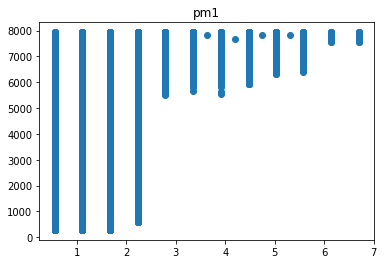

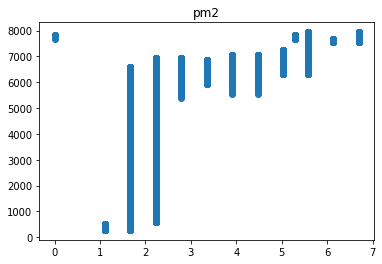

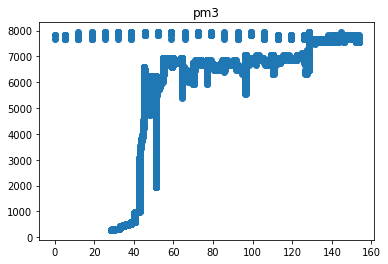

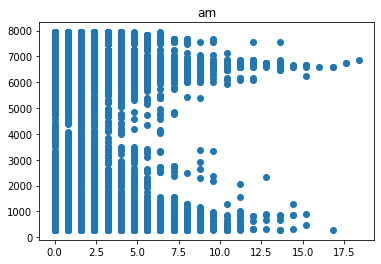

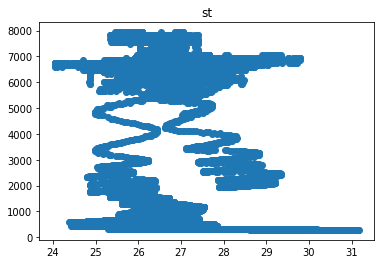

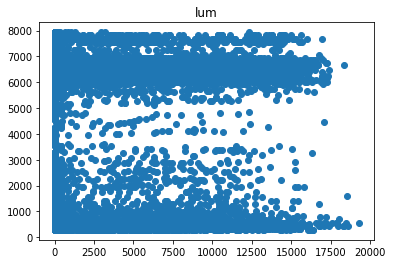

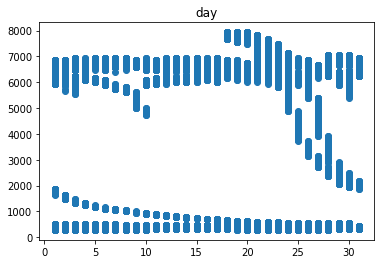

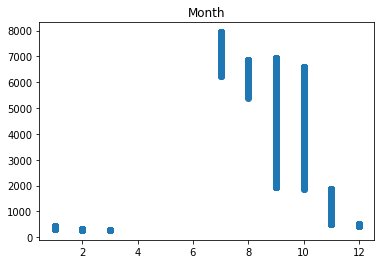

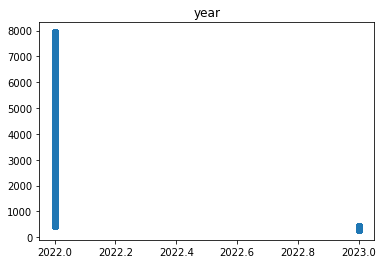

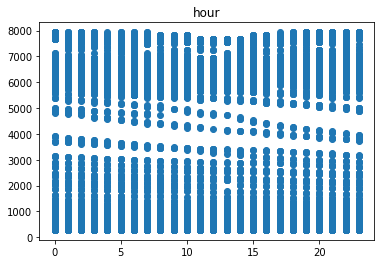

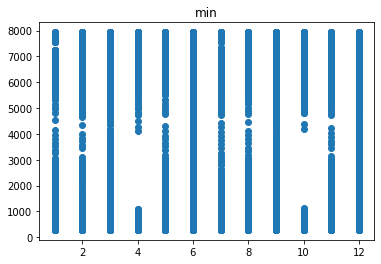

In [74]:
for i in data1.columns.drop('sm'):
  ypoints = data1['sm']
  plt.scatter(data1[i], ypoints)
  plt.title(i)
  plt.show()

In [31]:
data2['ttime']=pd.to_datetime(data2.ttime, format='%Y-%m-%d %H:%M:%S')
data2.set_index('ttime',inplace=True)
data2['day']=data2.index.day
data2['Month']=data2.index.month
data2['year']=data2.index.year
data2['hour']=data2.index.hour
data2['min']=(data2.index.minute//5)+1
data2.reset_index(inplace=True)
data2=data2.drop(['ttime'],1)
data2

<ipython-input-31-53b73b87c543>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2=data2.drop(['ttime'],1)


,pm1,pm2,pm3,am,sm,lum,temp,humd,pres,day,Month,year,hour,min
0,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25,18,7,2022,15,8
1,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31,18,7,2022,15,9
2,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82,18,7,2022,15,10
3,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94,18,7,2022,15,11
4,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25,18,7,2022,15,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161,0.55,1.11,27.38,3.2,327.0,6352.0,27.04,32.24,93560.72,10,3,2023,8,12
20162,1.11,1.11,27.38,3.2,327.0,7057.0,28.53,28.69,93574.12,10,3,2023,9,6
20163,1.67,1.11,27.38,4.8,327.0,7661.0,30.07,24.39,93571.75,10,3,2023,9,12
20164,0.55,1.67,27.93,4.0,327.0,8386.0,31.55,22.99,93558.36,10,3,2023,10,5


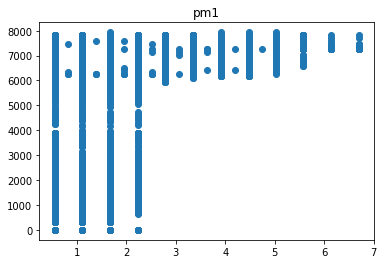

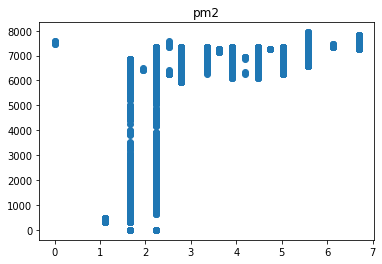

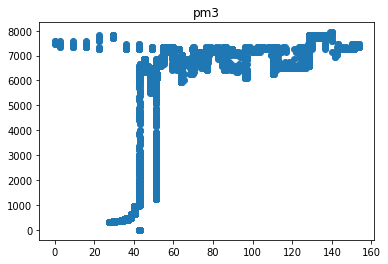

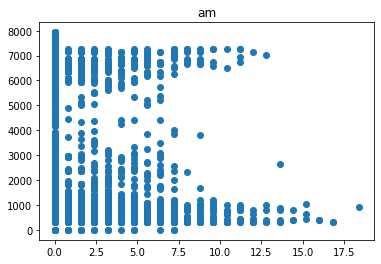

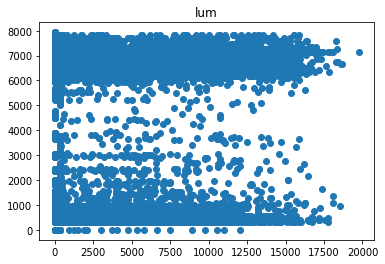

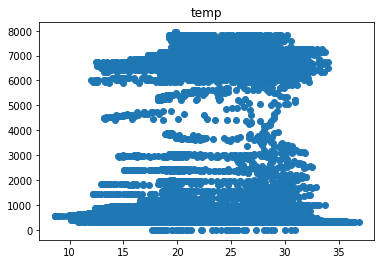

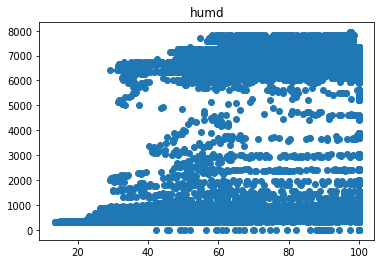

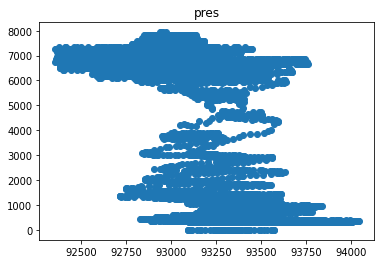

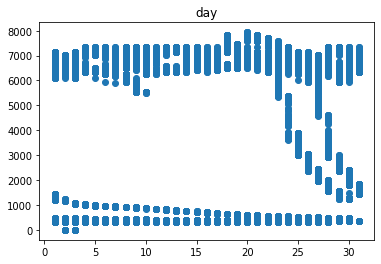

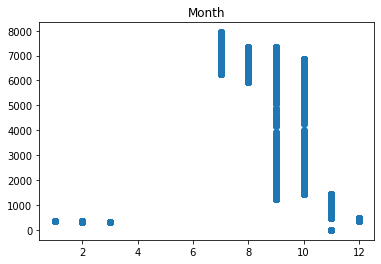

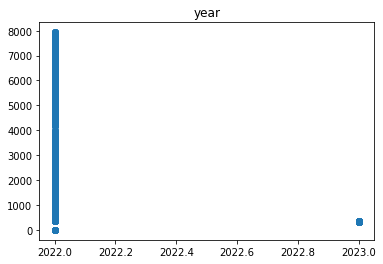

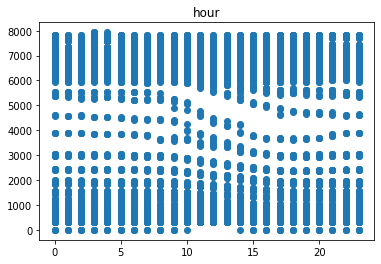

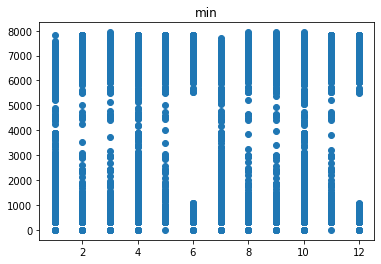

In [75]:
for i in data2.columns.drop('sm'):
  ypoints = data2['sm']
  plt.scatter( data2[i],ypoints)
  plt.title(i)
  plt.show()

#Combine Data

In [32]:
data_comb = data1.merge( data2, on=['day','Month','year','hour','min'], how='outer')
data_comb

,pm1_x,pm2_x,pm3_x,am_x,sm_x,st,lum_x,day,Month,year,...,min,pm1_y,pm2_y,pm3_y,am_y,sm_y,lum_y,temp,humd,pres
0,3.63,0.0,0.0,3.2,7813.0,25.65,15001.0,18,7,2022,...,9,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
1,4.19,0.0,0.0,4.8,7692.0,25.66,13863.0,18,7,2022,...,10,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
2,4.74,0.0,0.0,4.0,7813.0,25.67,13788.0,18,7,2022,...,11,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
3,5.30,0.0,0.0,4.8,7813.0,25.68,14383.0,18,7,2022,...,12,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25
4,0.55,5.3,5.3,3.2,7813.0,25.69,14621.0,18,7,2022,...,1,1.11,2.51,2.51,0.0,7463.0,3238.0,24.27,82.98,92820.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,2023,...,12,0.55,1.11,27.38,3.2,327.0,6352.0,27.04,32.24,93560.72
33034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,2023,...,6,1.11,1.11,27.38,3.2,327.0,7057.0,28.53,28.69,93574.12
33035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,2023,...,12,1.67,1.11,27.38,4.8,327.0,7661.0,30.07,24.39,93571.75
33036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,2023,...,5,0.55,1.67,27.93,4.0,327.0,8386.0,31.55,22.99,93558.36


In [33]:
# data_comb.columns
print('Count of missing values:\n',data_comb.shape[0]-data_comb.count())

Count of missing values:
 pm1_x    13697
pm2_x    13697
pm3_x    13697
am_x     13697
sm_x     13697
st       13697
lum_x    13697
day          0
Month        0
year         0
hour         0
min          0
pm1_y    12872
pm2_y    12872
pm3_y    12872
am_y     12872
sm_y     12872
lum_y    12872
temp     12872
humd     12872
pres     12872
dtype: int64


In [34]:
data_comb["pm1"] = data_comb[['pm1_x','pm1_y']].mean(axis=1)
data_comb["pm2"] = data_comb[['pm2_x','pm2_y']].mean(axis=1)
data_comb["pm3"] = data_comb[['pm3_x','pm3_y']].mean(axis=1)
data_comb["am"] = data_comb[['am_x','am_y']].mean(axis=1)
data_comb["sm"] = data_comb[['sm_x','sm_y']].mean(axis=1)
data_comb["lum"] = data_comb[['lum_x','lum_y']].mean(axis=1)
data_comb = data_comb.drop(['pm1_x','pm1_y','pm2_x','pm2_y','pm3_x','pm3_y','am_x','am_y','sm_x','sm_y','lum_x','lum_y'],1)

<ipython-input-34-3c3a574137cf>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_comb = data_comb.drop(['pm1_x','pm1_y','pm2_x','pm2_y','pm3_x','pm3_y','am_x','am_y','sm_x','sm_y','lum_x','lum_y'],1)


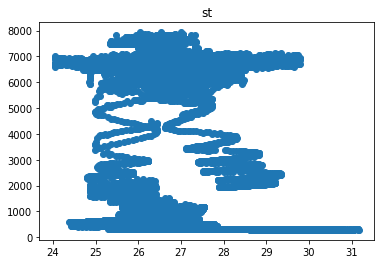

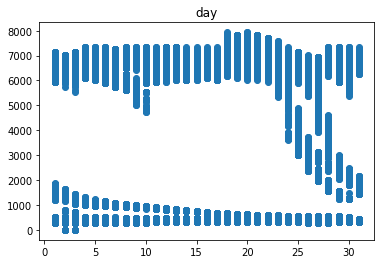

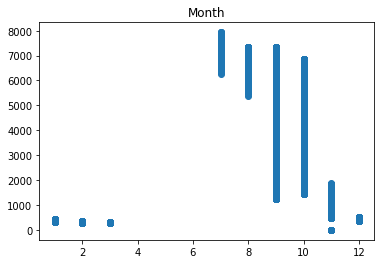

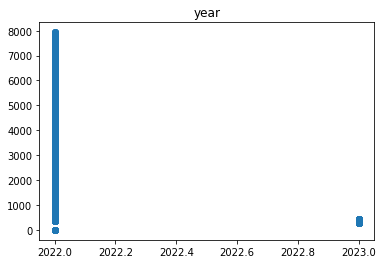

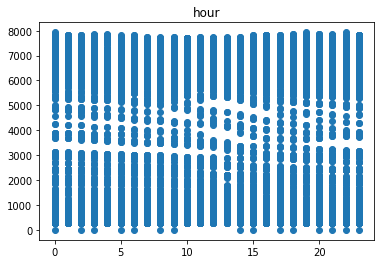

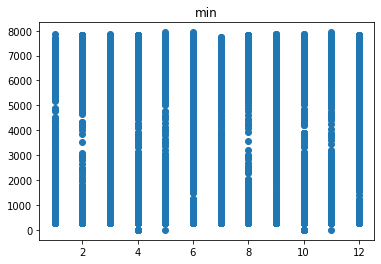

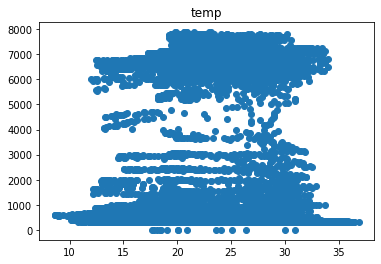

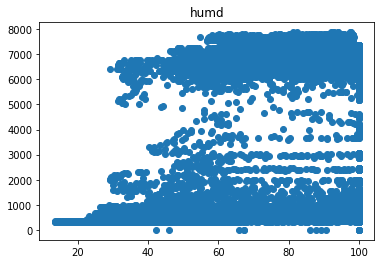

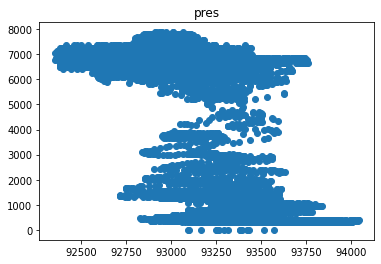

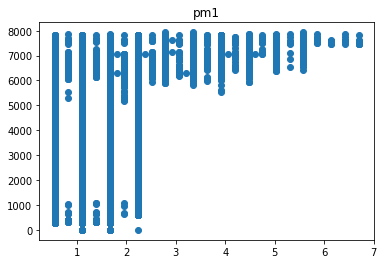

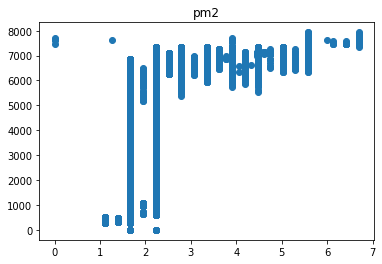

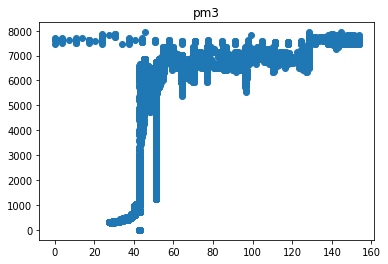

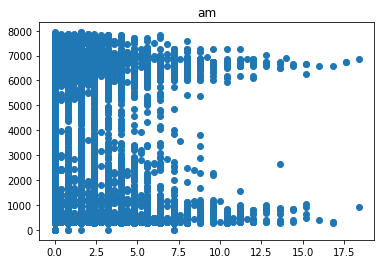

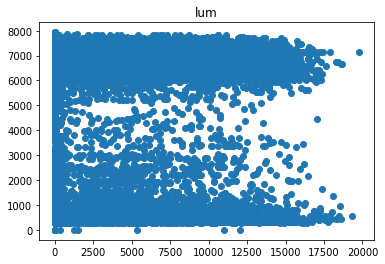

In [77]:
for i in data_comb.columns.drop('sm'):
  ypoints = data_comb['sm']
  plt.scatter(data_comb[i], ypoints)
  plt.title(i)
  plt.show()

In [35]:
data_comb.isnull().sum()

st       13697
day          0
Month        0
year         0
hour         0
min          0
temp     12872
humd     12872
pres     12872
pm1          0
pm2          0
pm3          0
am           0
sm           0
lum          0
dtype: int64

In [36]:
data_comb.describe()

,st,day,Month,year,hour,min,temp,humd,pres,pm1,pm2,pm3,am,sm,lum
count,19341.000000,33038.000000,33038.000000,33038.000000,33038.000000,33038.000000,20166.000000,20166.000000,20166.000000,33038.000000,33038.000000,33038.000000,33038.000000,33038.000000,33038.000000
mean,26.852714,16.203644,8.086809,2022.162994,11.527998,6.505388,22.625972,78.329035,93154.619405,1.534521,2.476357,57.103645,1.383715,4122.373524,2795.742206
std,1.163759,9.026522,3.128060,0.369366,6.992460,3.456231,4.666760,24.007034,290.963485,0.976174,1.183368,26.138342,2.090352,3007.643883,4166.394793
min,24.040000,1.000000,1.000000,2022.000000,0.000000,1.000000,8.610000,13.320000,92352.450000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.110000,8.000000,7.000000,2022.000000,5.000000,4.000000,20.000000,61.690000,92976.272500,0.550000,1.670000,36.880000,0.000000,474.000000,1.000000
50%,26.700000,17.000000,9.000000,2022.000000,12.000000,6.000000,21.430000,88.220000,93152.930000,1.110000,2.230000,48.330000,0.000000,6173.000000,47.500000
75%,27.390000,24.000000,10.000000,2022.000000,18.000000,9.000000,26.110000,100.000000,93350.997500,2.230000,3.350000,70.400000,2.400000,6757.000000,4991.375000
max,31.170000,31.000000,12.000000,2023.000000,23.000000,12.000000,36.880000,100.000000,94042.780000,6.700000,6.700000,153.660000,18.390000,7937.000000,19767.000000


#Model Runn Prep

In [5]:
from sklearn.preprocessing import StandardScaler        
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor


In [42]:
df1=pd.read_csv('/content/data_comb.csv')
# df1=df1.drop(['temp' ,'humd','st', 'pres'],axis=1)

In [43]:
df1.head()

,Unnamed: 0,st,day,Month,year,hour,min,temp,humd,pres,pm1,pm2,pm3,am,sm,lum
0,0,25.65,18,7,2022,15,9,23.47,88.37,92848.31,2.510,0.000,0.000,1.6,7694.5,12625.0
1,1,25.66,18,7,2022,15,10,23.64,85.26,92844.82,3.070,0.000,0.000,2.4,7634.0,13249.5
2,2,25.67,18,7,2022,15,11,23.62,85.93,92834.94,3.625,0.000,0.000,2.0,7638.0,11053.0
3,3,25.68,18,7,2022,15,12,23.82,86.06,92815.25,2.925,1.255,1.255,2.4,7638.0,9266.0
4,4,25.69,18,7,2022,16,1,24.27,82.98,92820.05,0.830,3.905,3.905,1.6,7638.0,8929.5


In [44]:
df1.isnull().sum()

Unnamed: 0        0
st            13697
day               0
Month             0
year              0
hour              0
min               0
temp          12872
humd          12872
pres          12872
pm1               0
pm2               0
pm3               0
am                0
sm                0
lum               0
dtype: int64

In [45]:
X=df1.drop('sm',axis=1)
y=df1['sm']

# Random Forest Regressor

In [52]:
def rfr_score_dataset(X_train, X_test, y_train, y_test):  
  forest = RandomForestRegressor(n_estimators=1000, 
                                criterion='squared_error', 
                                random_state=1, 
                                n_jobs=-1)
  forest.fit(X_train, y_train)
  y_test_pred = forest.predict(X_test)

  print("MSE : ",(mean_squared_error(y_test, y_test_pred)))
  print("MAE : ",mean_absolute_error(y_test, y_test_pred))
  print('score:', forest.score(X_test, y_test))
  print("R square : ",r2_score(y_test, y_test_pred, force_finite=False))

# # for t in range(5,9,1) :
#   # for r in range(0,100,20) :
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=80, test_size=20,random_state=32)
# print("train size : 80  random state : 32")
# print(rfr_score_dataset( X_train, X_valid, y_train, y_valid))

##RFR Imputation
 * use of Imputation method to clean Null Values

In [54]:
from sklearn.impute import SimpleImputer

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=32)


# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(rfr_score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
MSE :  4487.828116775802
MAE :  32.106408898305084
score: 0.9995056557239824
R square :  0.9995056557239824
None


* MAE :  32.106408898305084
* score: 0.9995056557239824

In [ ]:
#train size : 80% random state : 60
# MSE :  3203.7463507195666
# score: 0.9996242501807985

##RFR An Extension to Imputation

*   use of Imputation method to clean Null Values
*   And column is Added to classify Changed value



In [53]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()


cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(rfr_score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
MSE :  4371.457697228775
MAE :  31.790357067191284
score: 0.99951847418523
R square :  0.99951847418523
None


* MAE :  31.790357067191284
* score: 0.99951847418523

#RFR Pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


## RFR pipeline Imputation

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=32)

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer(strategy="mean")),
                              ('model', RandomForestRegressor(n_estimators=1000, random_state=32))
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(imputed_X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(imputed_X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)
print(my_pipeline.score(imputed_X_valid, y_valid))

MAE: 32.094662076271185
0.9995066681120112


##RFR pipeline An Extension to Imputation

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=32)

X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()


cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

# Preprocessing of training data, fit model 
my_pipeline.fit(imputed_X_train_plus, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(imputed_X_valid_plus)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)
print(my_pipeline.score(imputed_X_valid_plus, y_valid))

MAE: 31.739522397094426
0.9995207551616186


#XG Boost


 ## XG Boost Imputation

In [69]:
from xgboost import XGBRegressor
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=32)

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

my_model1 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model1.fit(imputed_X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(imputed_X_valid, y_valid)], 
             verbose=False)


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
preds = my_model1.predict(imputed_X_valid)
print(mean_absolute_error(y_valid, preds))
print(my_model1.score(imputed_X_valid, y_valid))

40.77477760407307
0.9992572415266866


## XG Boost An Extension to Imputation




In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=32)

X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()


cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(imputed_X_train_plus, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(imputed_X_valid_plus, y_valid)], 
             verbose=False)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
preds = my_model.predict(imputed_X_valid_plus)
print(mean_absolute_error(y_valid, preds))
print(my_model.score(imputed_X_valid_plus, y_valid))

43.111823557652805
0.9992541126453306


In [ ]:
# 44.41299256285513
# 99.92987124951946

# MAE: 36.268992130750604
# 99.94174852973395

# RESULT (comparing all result)

****
****
***Random Forest Regressor***
****
****
**RFR Imputation**
* MAE : 32.106408898305084
* score: 0.9995056557239824
*****
**RFR An Extension to Imputation**
* MAE :  31.790357067191284
* score: 0.99951847418523
****
****
***RFR Pipeline***
****
****
**RFR Pipeline Imputation**
* MAE: 32.094662076271185
* score: 0.9995066681120112
****
**RFR Pipeline An Extension to Imputation**
* MAE: 31.739522397094426
* score: 0.9995207551616186
****
****
***XG Boost***
****
****
**XG Boost Imputation**
* MAE: 40.77477760407307
* score: 0.9992572415266866
****
**XG Boost An Extension to Imputation**
* MAE: 43.111823557652805
* score: 0.9992541126453306
****
****

# BEST MODEL

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=32)

X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()


cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer(strategy="mean")),
                              ('model', RandomForestRegressor(n_estimators=1000, random_state=32))
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(imputed_X_train_plus, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(imputed_X_valid_plus)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)
print(my_pipeline.score(imputed_X_valid_plus, y_valid))